In [42]:
import math, random
from pprint import pprint

In [39]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

# this isn't right if you don't from __future__ import division
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))


In [14]:
import random
from __future__ import division

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [5]:
class KMeans:
    """performs k-means clustering"""

    def __init__(self, k):
        self.k = k          # number of clusters
        self.means = None   # means of clusters

    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs):
        # choose k random points as the initial means
        self.means = random.sample(inputs, self.k)
        assignments = None

        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)

            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return

            # Otherwise keep the new assignments,
            assignments = new_assignments

            # And compute new means based on the new assignments
            for i in range(self.k):
                # find all the points assigned to cluster i
                i_points = [p for p, a in zip(inputs, assignments) if a == i]

                # make sure i_points is not empty so don't divide by 0
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [17]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]


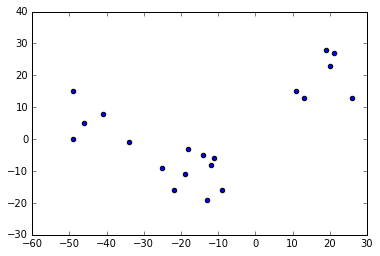

In [18]:
from matplotlib import pyplot as plt
plt.scatter(zip(*inputs)[0],zip(*inputs)[1])


In [15]:

random.seed(0)          # so you get the same results as me
clusterer = KMeans(3)
clusterer.train(inputs)
print clusterer.means

[[-43.800000000000004, 5.4], [-15.888888888888888, -10.333333333333332], [18.333333333333332, 19.833333333333332]]


In [19]:
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)

    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

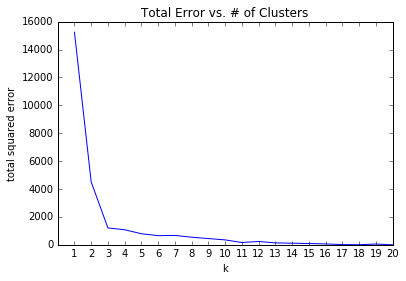

In [22]:
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

In [23]:
path_to_png_file = r"./reclamador2-662x385.png"   # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(path_to_png_file)

In [24]:
len(img), len(img[0])

(385, 662)

In [25]:
img[0][0]

array([ 0.28235295,  0.54509807,  0.07058824,  1.        ], dtype=float32)

In [26]:
pixels = [pixel for row in img for pixel in row]

In [27]:
clusterer = KMeans(5)
clusterer.train(pixels)   # this might take a while


In [28]:
def recolor(pixel):
    cluster = clusterer.classify(pixel)        # index of the closest cluster
    return clusterer.means[cluster]            # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row]   # recolor this row of pixels
           for row in img]                     # for each row in the image


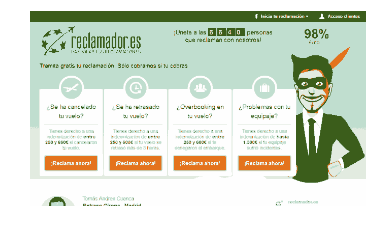

In [29]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [31]:
len((1,)),len((1,2))

(1, 2)

In [32]:
def is_leaf(cluster):
    """a cluster is a leaf if it has length 1"""
    return len(cluster) == 1

def get_children(cluster):
    """returns the two children of this cluster if it's a merged cluster;
    raises an exception if this is a leaf cluster"""
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

def get_values(cluster):
    """returns the value in this cluster (if it's a leaf cluster)
    or all the values in the leaf clusters below it (if it's not)"""
    if is_leaf(cluster):
        return cluster      # is already a 1-tuple containing value
    else:
        return [value
                for child in get_children(cluster)
                for value in get_values(child)]

In [33]:
def cluster_distance(cluster1, cluster2, distance_agg=min):
    """compute all the pairwise distances between cluster1 and cluster2
    and apply _distance_agg_ to the resulting list"""
    return distance_agg([distance(input1, input2)
                         for input1 in get_values(cluster1)
                         for input2 in get_values(cluster2)])



In [34]:
def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf')
    else:
        return cluster[0]  # merge_order is first element of 2-tuple

In [35]:
def bottom_up_cluster(inputs, distance_agg=min):
    # start with every input a leaf cluster / 1-tuple
    clusters = [(input,) for input in inputs]

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min([(cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]],
                      key=lambda (x, y): cluster_distance(x, y, distance_agg))

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = (len(clusters), [c1, c2])

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

In [44]:
base_cluster = bottom_up_cluster(inputs)
pprint(base_cluster)

(0,
 [(1,
   [(3,
     [(14, [(18, [([19, 28],), ([21, 27],)]), ([20, 23],)]), ([26, 13],)]),
    (16, [([11, 15],), ([13, 13],)])]),
  (2,
   [(4,
     [(5,
       [(9, [(11, [([-49, 0],), ([-46, 5],)]), ([-41, 8],)]),
        ([-49, 15],)]),
      ([-34, -1],)]),
    (6,
     [(7,
       [(8, [(10, [([-22, -16],), ([-19, -11],)]), ([-25, -9],)]),
        (13,
         [(15, [(17, [([-11, -6],), ([-12, -8],)]), ([-14, -5],)]),
          ([-18, -3],)])]),
      (12, [([-13, -19],), ([-9, -16],)])])])])


In [45]:
def generate_clusters(base_cluster, num_clusters):
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

In [54]:
four_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 4)]

four_clusters

[[[19, 28], [21, 27], [20, 23], [26, 13]],
 [[11, 15], [13, 13]],
 [[-49, 0], [-46, 5], [-41, 8], [-49, 15], [-34, -1]],
 [[-22, -16],
  [-19, -11],
  [-25, -9],
  [-11, -6],
  [-12, -8],
  [-14, -5],
  [-18, -3],
  [-13, -19],
  [-9, -16]]]

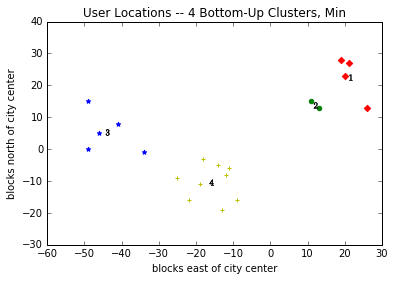

In [55]:
for i, cluster, marker, color in zip([1, 2, 3, 4],
                                     three_clusters,
                                     ['D','o','*','+'],
                                     ['r','g','b','y']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 4 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()